In [20]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tgz', origin=dataset_url, extract=True)
print(data_dir)
data_dir = pathlib.Path(data_dir).with_suffix('')
print(data_dir)

C:\Users\Welcome\.keras\datasets\flower_photos.tgz
C:\Users\Welcome\.keras\datasets\flower_photos


In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


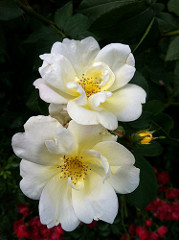

In [24]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

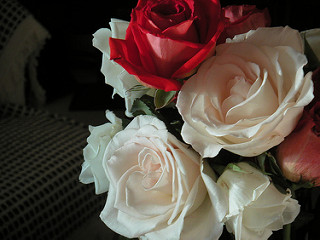

In [25]:
PIL.Image.open(str(roses[1]))

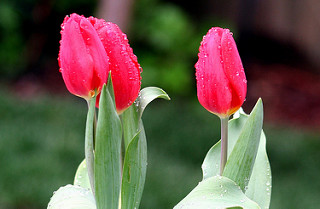

In [26]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

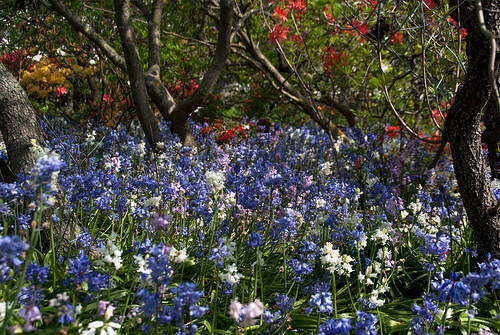

In [27]:
PIL.Image.open(str(tulips[1]))

In [28]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
train_ds = tf.keras.utils.image_dataset_from_directory (
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [35]:
validate_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


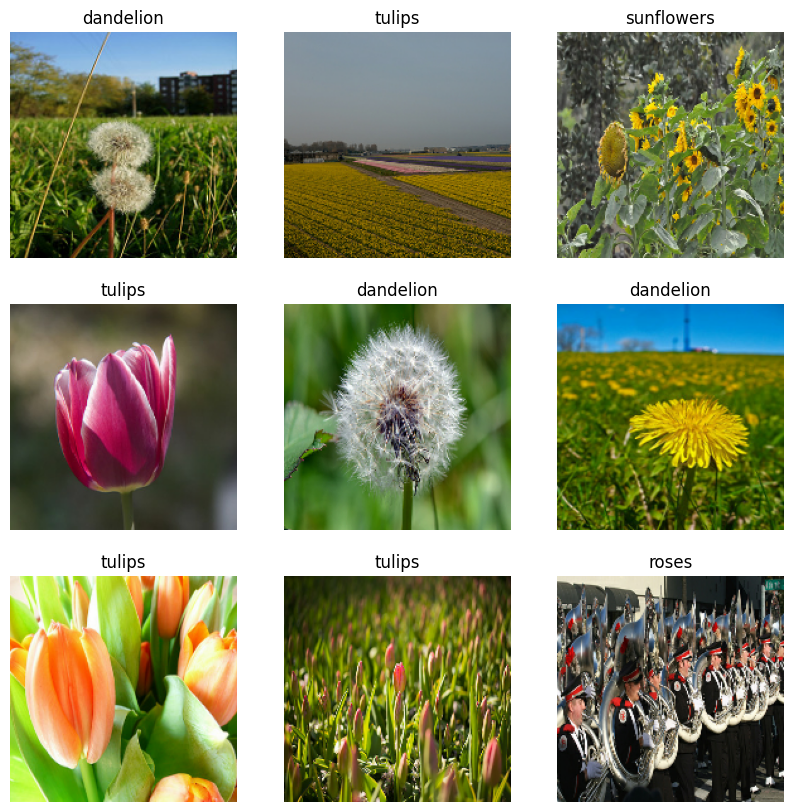

In [44]:
plt.figure(figsize=(10,10)) 
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [48]:
for images_batch,labels_batch in train_ds:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validate_ds = validate_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [58]:
# One of the ways for normalization
normalization_layer = layers.Rescaling(scale=1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [62]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        1

In [67]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=validate_ds,
    epochs=epochs
)

Epoch 1/10


92/92 [==============================] - 18s 149ms/step - loss: 1.3923 - accuracy: 0.4074 - val_loss: 1.1383 - val_accuracy: 0.5490
Epoch 2/10
92/92 [==============================] - 14s 153ms/step - loss: 1.0639 - accuracy: 0.5671 - val_loss: 1.0337 - val_accuracy: 0.5886
Epoch 3/10
92/92 [==============================] - 13s 146ms/step - loss: 0.9140 - accuracy: 0.6448 - val_loss: 0.9585 - val_accuracy: 0.6117
Epoch 4/10
92/92 [==============================] - 13s 141ms/step - loss: 0.7446 - accuracy: 0.7214 - val_loss: 0.9692 - val_accuracy: 0.6362
Epoch 5/10
92/92 [==============================] - 14s 151ms/step - loss: 0.5409 - accuracy: 0.8028 - val_loss: 0.9312 - val_accuracy: 0.6390
Epoch 6/10
92/92 [==============================] - 14s 148ms/step - loss: 0.3489 - accuracy: 0.8777 - val_loss: 1.1011 - val_accuracy: 0.6512
Epoch 7/10
92/92 [==============================] - 14s 151ms/step - loss: 0.1886 - accuracy: 0.9404 - val_loss: 1.2489 - val_accuracy: 0.63

Text(0.5, 1.0, 'Training and Validation Loss')

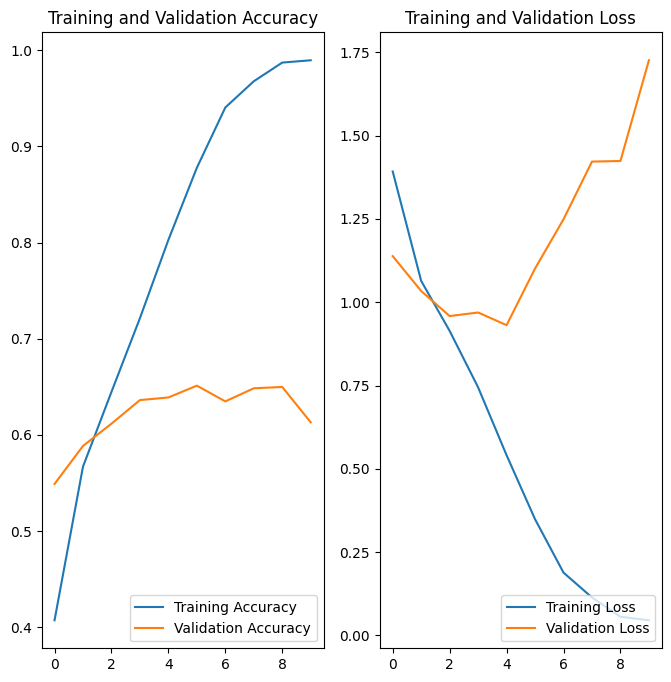

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [76]:
data_augmentation = Sequential(
    [
        layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
        layers.RandomZoom(0.2),
        layers.RandomRotation(0.2)
    ]
)

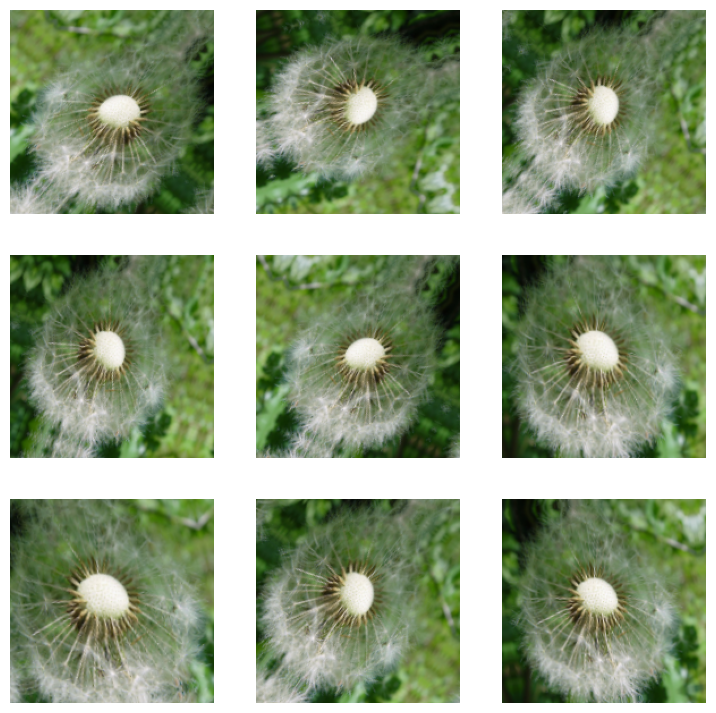

In [77]:
plt.figure(figsize=(9,9))

for images,labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [79]:
model = Sequential(
    [
        data_augmentation,
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, name='outputs')
    ]
)

In [80]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [83]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=validate_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 17s 190ms/step - loss: 0.6140 - accuracy: 0.7619 - val_loss: 0.6802 - val_accuracy: 0.7330
Epoch 2/15
92/92 [==============================] - 21s 230ms/step - loss: 0.6001 - accuracy: 0.7565 - val_loss: 0.6976 - val_accuracy: 0.7248
Epoch 3/15
92/92 [==============================] - 19s 208ms/step - loss: 0.5837 - accuracy: 0.7745 - val_loss: 0.7902 - val_accuracy: 0.7016
Epoch 4/15
92/92 [==============================] - 22s 237ms/step - loss: 0.5810 - accuracy: 0.7725 - val_loss: 0.7206 - val_accuracy: 0.7207
Epoch 5/15
92/92 [==============================] - 23s 254ms/step - loss: 0.6053 - accuracy: 0.7646 - val_loss: 0.7859 - val_accuracy: 0.7084
Epoch 6/15
92/92 [==============================] - 20s 220ms/step - loss: 0.5638 - accuracy: 0.7834 - val_loss: 0.7697 - val_accuracy: 0.6975
Epoch 7/15
92/92 [==============================] - 20s 223ms/step - loss: 0.5472 - accuracy: 0.7786 - val_loss: 0.7006 - val_accuracy: 0.7371

Text(0.5, 1.0, 'Training and Validation Loss')

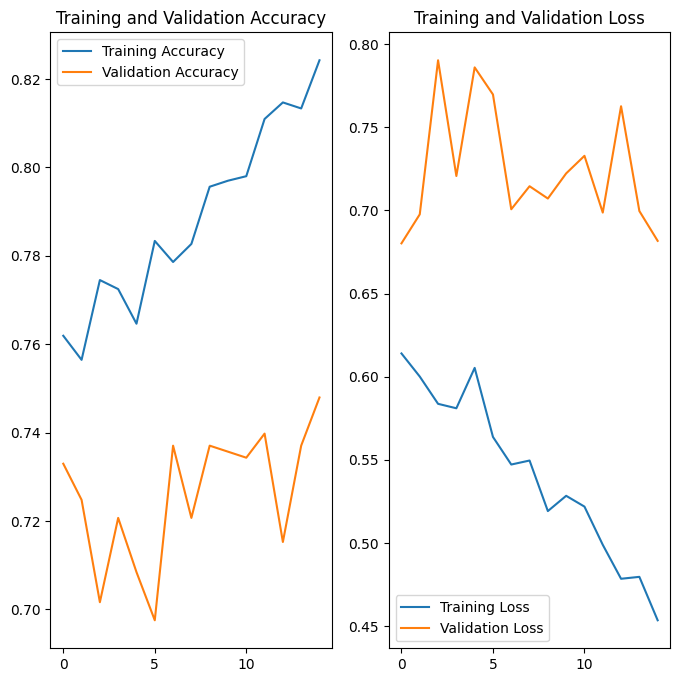

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

In [107]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower.jpg', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width, 3)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
print(predictions)

score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 41ms/step
[[-10.275667     1.8728718   -0.7150979    9.517635     0.46948314]]
This image most likely belongs to sunflowers with a 99.94 percent confidence.


In [120]:
# converting model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# saving model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Welcome\AppData\Local\Temp\tmpvgh091j4\assets


INFO:tensorflow:Assets written to: C:\Users\Welcome\AppData\Local\Temp\tmpvgh091j4\assets


In [121]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [122]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}

In [126]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [127]:
predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
print(predictions_lite)
score_lite = tf.nn.softmax(predictions_lite)

[[-10.275667     1.8728709   -0.71509904   9.517632     0.46948302]]


In [128]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 99.94 percent confidence.
